# Find and Plot Top Motifs

This is an example of how to use the motif function.

## Load libraries

In [2]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

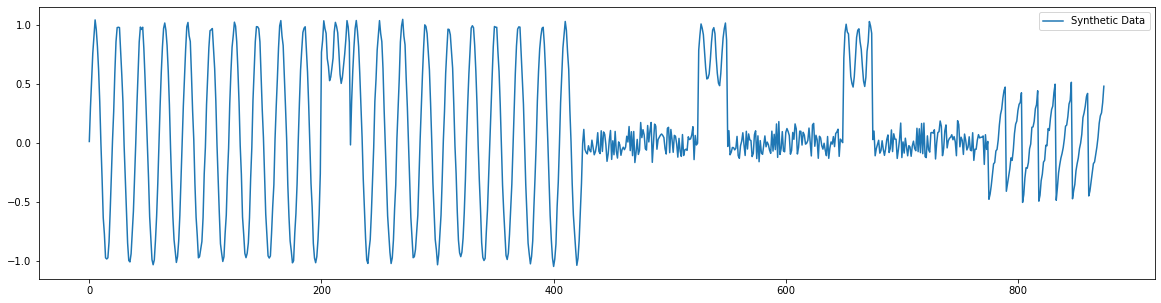

In [4]:
data = pd.read_csv('rawdata.csv')
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

## Calculate Matrix Profile and Motifs

In [12]:
m=32
mp = matrixProfile.stomp(pattern,m)

mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=10)

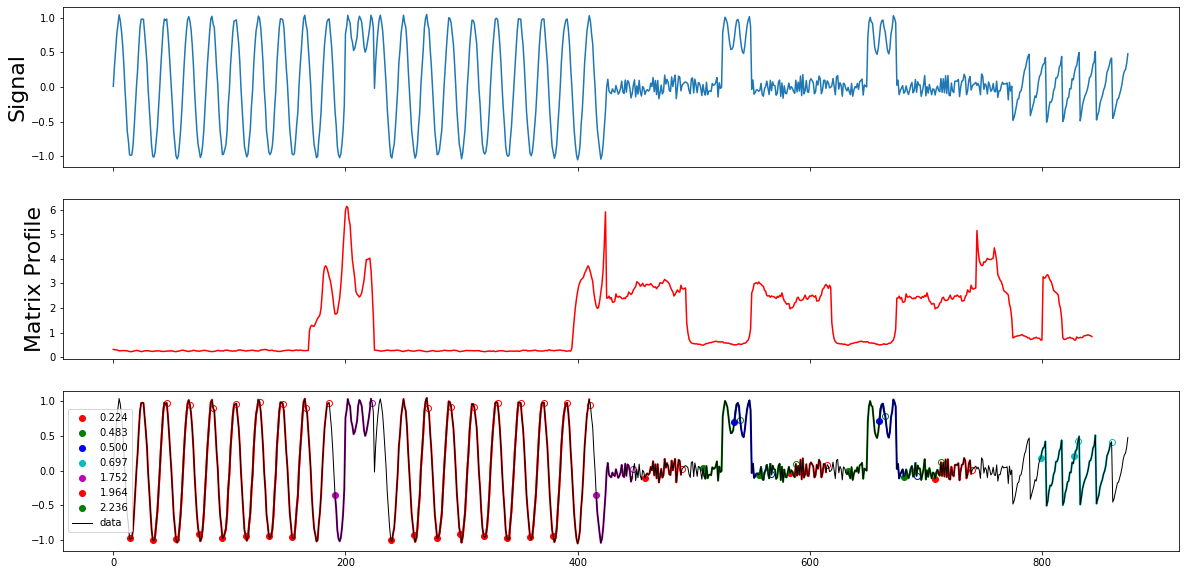

In [13]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)

#Plot the Motifs

colori = 0
colors = 'rgbcm'
for ms,min_d in zip(mtfs,motif_d):
    c =colors[colori % len(colors)]
    starts = list(ms)
    ends = [min(s + m,len(pattern)-1) for s in starts]
    ax3.plot(starts, pattern[starts],  c +'o',  label=f"{min_d:.3f}")
    ax3.plot(ends, pattern[ends],  c +'o', markerfacecolor='none')
    for nn in ms:
        ax3.plot(range(nn,nn+m),pattern[nn:nn+m], c , linewidth=2)
    colori += 1
    
plt.plot(pattern, 'k', linewidth=1, label="data")
ax3.legend()
#plt.xlim((0,100))
plt.show()